In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris['data'],columns=iris['feature_names'])
target = pd.DataFrame(iris['target'],columns=['class'])

data = pd.concat([feature,target],axis=1)
df=data[data['class']!=0]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\Howard\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


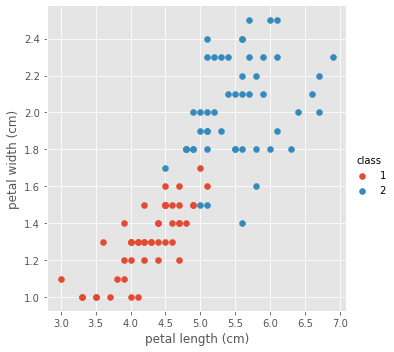

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
g=sns.FacetGrid(df,hue='class',size=5)
g.map(plt.scatter,"petal length (cm)" , "petal width (cm)")
g.add_legend()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.iloc[:,2:4].values
Y=df.iloc[:,4].values
sc=StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [17]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr= LogisticRegression(C=100.0 ,random_state=1)
#C=1/a
lr.fit(X_std,Y)
theta_0=lr.intercept_
theta_1=lr.coef_[0][0]
theta_2=lr.coef_[0][1]
print(lr.coef_)
print(lr.intercept_)
print(theta_1)

[[4.55406382 4.29353654]]
[0.45330441]
4.554063816688208


<ipython-input-8-535bd7d8e94e>:12: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)


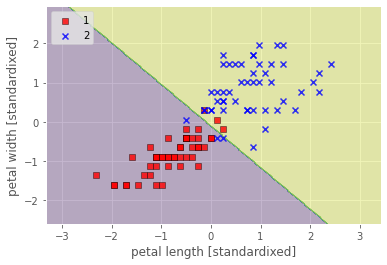

In [14]:
plot_dicision_regions(X_std,Y,classifier=lr)
x=np.linspace(-3,3.5)
plt.xlabel('petal length [standardixed]')
plt.ylabel('petal width [standardixed]')
plt.legend(loc='upper left')

No handles with labels found to put in legend.


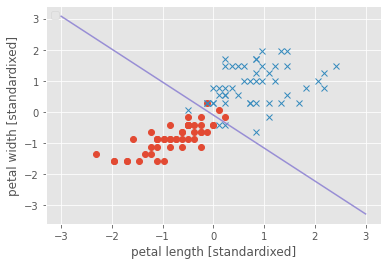

In [19]:
x=np.linspace(-3,3,200)
plt.plot(X_std[Y==1,0],X_std[Y==1,1],'o')
plt.plot(X_std[Y==2,0],X_std[Y==2,1],'x')
plt.plot(x,-(theta_0+theta_1*x)/theta_2)
plt.xlabel('petal length [standardixed]')
plt.ylabel('petal width [standardixed]')
plt.legend(loc='upper left')

### 貝氏分類

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris['data'],columns=iris['feature_names'])
target = pd.DataFrame(iris['target'],columns=['class'])

data = pd.concat([feature,target],axis=1)

C:\Users\Howard\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


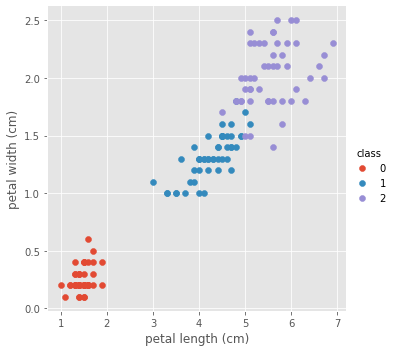

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
g=sns.FacetGrid(data,hue='class',size=5)
g.map(plt.scatter,"petal length (cm)" , "petal width (cm)")
g.add_legend()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(data,train_size=0.7)
y_train,y_test =x_train.iloc[:,4].values,x_test.iloc[:,4].values
x_train,x_test=x_train.iloc[:,:2].values,x_test.iloc[:,:2].values
sc=StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
sc.fit(x_test)
X_test_std = sc.transform(x_test)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=data.iloc[:,:2].values
y=data.iloc[:,4].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
sc=StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
sc.fit(x_test)
X_test_std = sc.transform(x_test)



In [4]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_std,y_train)
#測試集預測答對率
acc_score = gnb.score(X_test_std,y_test)
print('acc {}%'.format(acc_score*100))
#測試集預測答案
Y_test_pred = gnb.predict(X_test_std)
print(Y_test_pred)

acc 73.33333333333333%
[2 0 0 1 2 1 2 1 2 0 0 1 0 1 0 2 2 1 2 2 2 0 2 1 1 2 1 2 0 1 0 0 1 1 2 2 0
 0 0 2 2 1 2 0 0]


In [5]:
from matplotlib.colors import ListedColormap
def plot_dicision_regions(X,Y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    camp = ListedColormap(colors[:len(np.unique(Y))])

    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y==cl,0],
                    y=X[Y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    
    if test_idx:
        x_test,y_test=X[test_idx,:],Y[test_idx]

        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=100,
                    label='test set')

    

<ipython-input-5-535bd7d8e94e>:12: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)
<ipython-input-5-535bd7d8e94e>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(x_test[:,0],


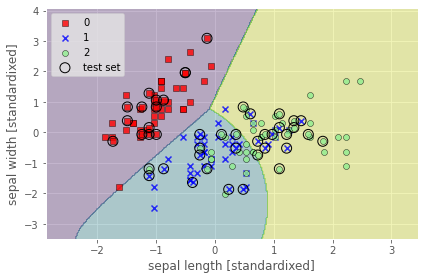

In [6]:
X_combined_std=np.vstack((X_train_std,X_test_std))
Y_combined_std=np.hstack((y_train,y_test))

plot_dicision_regions(X_combined_std,Y_combined_std,classifier=gnb,test_idx=range(105,150))
plt.xlabel('sepal length [standardixed]')
plt.ylabel('sepal width [standardixed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()